In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("User_BuysVenture.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000.0,0.0
1,15810944,Male,35,20000.0,0.0
2,15668575,Female,26,43000.0,0.0
3,15603246,Female,27,57000.0,0.0
4,15804002,Male,19,76000.0,0.0


In [3]:
from matplotlib import pyplot as p

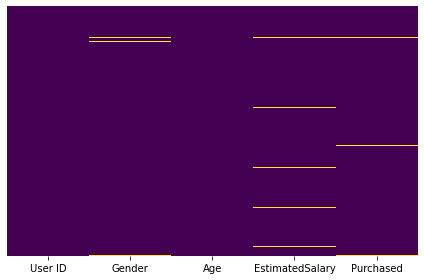

In [4]:
import seaborn as sns
def get_heatmap(df):
    p.figure(figsize=(6,4))
    sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
    p.tight_layout()
    return p.show()
get_heatmap(df)

In [5]:
df.describe

<bound method NDFrame.describe of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19          19000.0        0.0
1    15810944    Male   35          20000.0        0.0
2    15668575  Female   26          43000.0        0.0
3    15603246  Female   27          57000.0        0.0
4    15804002    Male   19          76000.0        0.0
..        ...     ...  ...              ...        ...
395  15691863  Female   46          41000.0        1.0
396  15706071    Male   51          23000.0        1.0
397  15654296  Female   50          20000.0        1.0
398  15755018    Male   36          33000.0        0.0
399  15594041     NaN   49          36000.0        NaN

[400 rows x 5 columns]>

In [6]:
df=df.dropna()
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000.0,0.0
1,15810944,Male,35,20000.0,0.0
2,15668575,Female,26,43000.0,0.0
3,15603246,Female,27,57000.0,0.0
4,15804002,Male,19,76000.0,0.0


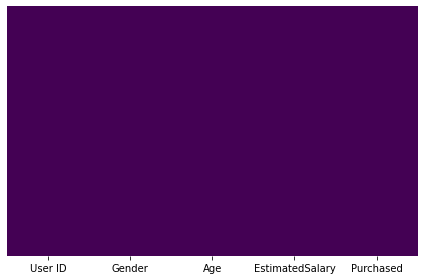

In [7]:
import seaborn as sns
def get_heatmap(df):
    p.figure(figsize=(6,4))
    sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
    p.tight_layout()
    return p.show()
get_heatmap(df)

In [8]:
from sklearn import preprocessing
LE=preprocessing.LabelEncoder()
df.Gender = LE.fit_transform(df.Gender)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000.0,0.0
1,15810944,1,35,20000.0,0.0
2,15668575,0,26,43000.0,0.0
3,15603246,0,27,57000.0,0.0
4,15804002,1,19,76000.0,0.0


In [9]:
#drop unrequried columns
df=df.drop('User ID',axis=1)
#df=df.drop('pf',axis=1)

In [10]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000.0,0.0
1,1,35,20000.0,0.0
2,0,26,43000.0,0.0
3,0,27,57000.0,0.0
4,1,19,76000.0,0.0


In [11]:
from sklearn.preprocessing import StandardScaler
sst=StandardScaler()
data_scaled=df.iloc[:,:-1].values
data_scaled=sst.fit_transform(data_scaled)
data_scaled=pd.DataFrame(data_scaled)

In [12]:
data_scaled.columns=['Age','EstimatedSalary','Purchased']
data_scaled.head()

,Age,EstimatedSalary,Purchased
0,1.018447,-1.808167,-1.489254
1,1.018447,-0.246000,-1.459847
2,-0.981887,-1.124719,-0.783478
3,-0.981887,-1.027084,-0.371776
4,1.018447,-1.808167,0.186963


In [13]:
data_scaled['Class']=df.Gender
data_scaled

,Age,EstimatedSalary,Purchased,Class
0,1.018447,-1.808167,-1.489254,1.0
1,1.018447,-0.246000,-1.459847,1.0
2,-0.981887,-1.124719,-0.783478,0.0
3,-0.981887,-1.027084,-0.371776,0.0
4,1.018447,-1.808167,0.186963,1.0
...,...,...,...,...
378,-0.981887,0.144541,-0.312961,1.0
379,-0.981887,0.827989,-0.842293,0.0
380,1.018447,1.316166,-1.371625,1.0
381,-0.981887,1.218531,-1.459847,1.0


In [14]:
data_scaled=data_scaled[data_scaled['Class'].notna()]
data_scaled

,Age,EstimatedSalary,Purchased,Class
0,1.018447,-1.808167,-1.489254,1.0
1,1.018447,-0.246000,-1.459847,1.0
2,-0.981887,-1.124719,-0.783478,0.0
3,-0.981887,-1.027084,-0.371776,0.0
4,1.018447,-1.808167,0.186963,1.0
...,...,...,...,...
378,-0.981887,0.144541,-0.312961,1.0
379,-0.981887,0.827989,-0.842293,0.0
380,1.018447,1.316166,-1.371625,1.0
381,-0.981887,1.218531,-1.459847,1.0


In [15]:
X=data_scaled.iloc[:,0:3]
Y=data_scaled.iloc[:,3:4]

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [17]:
X_train

,Age,EstimatedSalary,Purchased
198,-0.981887,1.706708,1.774958
109,1.018447,0.242177,-0.371776
159,-0.981887,-1.515261,-0.430591
286,1.018447,0.730354,0.275185
298,-0.981887,0.437447,0.010519
...,...,...,...
336,1.018447,0.046906,-0.254147
199,-0.981887,1.413802,1.304441
123,-0.981887,-1.124719,0.422221
47,-0.981887,-1.027084,-0.459998


In [18]:
y_train

,Class
198,1.0
109,0.0
159,0.0
286,0.0
298,1.0
...,...
336,1.0
199,1.0
123,1.0
47,0.0


In [19]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [20]:
y_pred=clf.predict(X_test)

In [21]:
y_pred

array([1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 0.])

In [22]:
y_test

,Class
146,0.0
156,1.0
283,0.0
63,1.0
313,0.0
...,...
17,1.0
257,1.0
139,1.0
316,0.0


In [23]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000.0,0.0
1,1,35,20000.0,0.0
2,0,26,43000.0,0.0
3,0,27,57000.0,0.0
4,1,19,76000.0,0.0
...,...,...,...,...
394,0,39,59000.0,0.0
395,0,46,41000.0,1.0
396,1,51,23000.0,1.0
397,0,50,20000.0,1.0
